<a href="https://colab.research.google.com/github/ChaejinE/MyPytorch/blob/main/PyTorch_Tips_Details/n_etcTips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# Variable(data)

- tensor에 데이터를 집어 넣을 때, Variable type으로 기존의 데이터를 변경하여 사용하곤 한다.
- Variable 생성 시 가장 많이 사용하는 옵션 중 하나는 학습이 필요한 weight인지 아닌지 지정해주는 옵션이다."

In [2]:
from torch.autograd import Variable

In [3]:
v1 = Variable(torch.rand(3), requires_grad = True)
v1

tensor([0.8719, 0.5405, 0.7457], requires_grad=True)

In [4]:
with torch.no_grad(): # 학습 x : 가독성, inference 용도로 만 사용한다는 뜻
  v2 = Variable(torch.rand(3))
v2

tensor([0.8085, 0.1418, 0.9585])

# F.interpolate() vs nn.Upsample()
- interpolation : Deep learning 에서는 작은 feature 크기를 크게 변경 시킬 때 사용 된다.

## functional.interpolate
```python
torch.nn.functional.interpolate(
    input, # input tensor
    size=None, # output spatial size로 int나 int 형 tuple이 입력으로 들어옵니다.
    scale_factor=None, # spatial size에 곱해지는 scale 값
    mode='nearest', # 어떤 방법으로 upsampling할 것인지 정하게 됩니다. 'nearest', 'linear', 'bilinear', 'bicubic', 'trilinear', 'area'
    align_corners=False, # interpolate 할 때, 가장자리를 어떻게 처리할 지 방법으로 아래 그림 참조.
)
```
- input, size, mode는 필수로 사용하고, align_corners는 추가적으로 사용한다.
- size는 batch와 channel을 뺀 사이즈여야한다.
- size와 scale factor중 하나만 입력하는 것이다.
- mode : Upsampling 방법
  - nearest : 주변 값을 실제 사용하는 것으로 현재 존재하는 실제 픽셀 값을 사용해야하는 경우
  - 예를들어 정수 값 픽셀들을 소수값이 생기지 않도록 하는데 쓸 수 있다.
  - bilinear : bilinear interpolation 방법을 이용한 것으로 height, width 속성을 가지는 데이터에 적합한 방법이라고 한다.
- align_corners

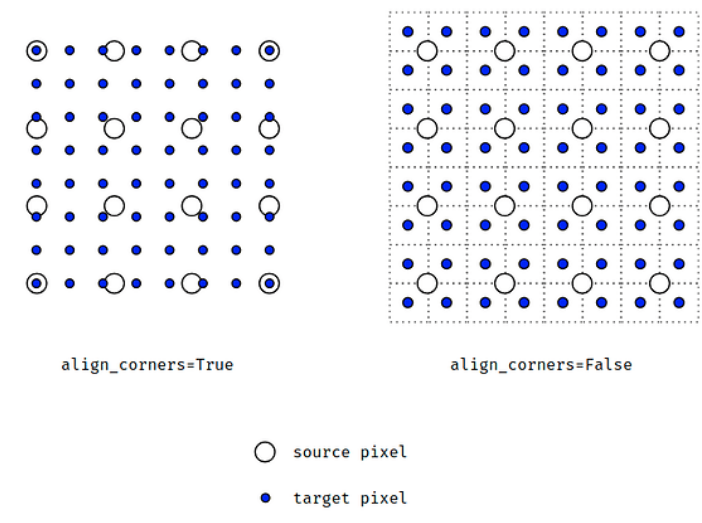

- algin_corners = True인 경우 Input의 Edge와 Output의 edge(corner)가 정렬을 맞춘 상태에서 interpolation 한다. **값들이 더 넓게 펼쳐진다.**
- segmentation 시 align_corners = True로 두면 좀 더 성능이 좋다고 알려져있다.
  - onnx 변환 시 버전에 따라 False로 둬야하는 경우도 있다하니 유의


In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
input = torch.arange(0, 16, dtype=torch.float32).reshape(1, 1, 4, 4)
input

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [7]:
F.interpolate(input, scale_factor=2, mode="nearest")

tensor([[[[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [12., 12., 13., 13., 14., 14., 15., 15.],
          [12., 12., 13., 13., 14., 14., 15., 15.]]]])

In [8]:
F.interpolate(input, scale_factor=0.8, mode="nearest")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


tensor([[[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.],
          [ 8.,  9., 10.]]]])

In [9]:
F.interpolate(input, scale_factor=2, mode="bilinear", align_corners=False)

tensor([[[[ 0.0000,  0.2500,  0.7500,  1.2500,  1.7500,  2.2500,  2.7500,
            3.0000],
          [ 1.0000,  1.2500,  1.7500,  2.2500,  2.7500,  3.2500,  3.7500,
            4.0000],
          [ 3.0000,  3.2500,  3.7500,  4.2500,  4.7500,  5.2500,  5.7500,
            6.0000],
          [ 5.0000,  5.2500,  5.7500,  6.2500,  6.7500,  7.2500,  7.7500,
            8.0000],
          [ 7.0000,  7.2500,  7.7500,  8.2500,  8.7500,  9.2500,  9.7500,
           10.0000],
          [ 9.0000,  9.2500,  9.7500, 10.2500, 10.7500, 11.2500, 11.7500,
           12.0000],
          [11.0000, 11.2500, 11.7500, 12.2500, 12.7500, 13.2500, 13.7500,
           14.0000],
          [12.0000, 12.2500, 12.7500, 13.2500, 13.7500, 14.2500, 14.7500,
           15.0000]]]])

In [10]:
F.interpolate(input, scale_factor=2, mode="bilinear", align_corners=True)

tensor([[[[ 0.0000,  0.4286,  0.8571,  1.2857,  1.7143,  2.1429,  2.5714,
            3.0000],
          [ 1.7143,  2.1429,  2.5714,  3.0000,  3.4286,  3.8571,  4.2857,
            4.7143],
          [ 3.4286,  3.8571,  4.2857,  4.7143,  5.1429,  5.5714,  6.0000,
            6.4286],
          [ 5.1429,  5.5714,  6.0000,  6.4286,  6.8571,  7.2857,  7.7143,
            8.1429],
          [ 6.8571,  7.2857,  7.7143,  8.1429,  8.5714,  9.0000,  9.4286,
            9.8571],
          [ 8.5714,  9.0000,  9.4286,  9.8571, 10.2857, 10.7143, 11.1429,
           11.5714],
          [10.2857, 10.7143, 11.1429, 11.5714, 12.0000, 12.4286, 12.8571,
           13.2857],
          [12.0000, 12.4286, 12.8571, 13.2857, 13.7143, 14.1429, 14.5714,
           15.0000]]]])

In [11]:
F.interpolate(input, size=(5, 3), mode="bilinear", align_corners=False)

tensor([[[[ 0.1667,  1.5000,  2.8333],
          [ 2.9667,  4.3000,  5.6333],
          [ 6.1667,  7.5000,  8.8333],
          [ 9.3667, 10.7000, 12.0333],
          [12.1667, 13.5000, 14.8333]]]])

## nn.Upsample()
```python
torch.nn.Upsample(
    size: Optional[Union[T, Tuple[T, ...]]] = None, 
    scale_factor: Optional[Union[T, Tuple[T, ...]]] = None, 
    mode: str = 'nearest', 
    align_corners: Optional[bool] = None
)
```
- input : 1d, 2d, 3d data 모두 받을 수 있다. (**Batch 제외한 dimension이다.**)
  - Batch x Channel x Height x Width
- mode : nearest, linear, bilinear, bicubic, trilinear ..
  - 주로 nearest, bilinear 사용


In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
input = torch.arange(0, 16, dtype=torch.float32).reshape(1, 1, 4, 4)
input

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [14]:
m = nn.Upsample(scale_factor=2, mode="nearest")
m(input)

tensor([[[[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
          [12., 12., 13., 13., 14., 14., 15., 15.],
          [12., 12., 13., 13., 14., 14., 15., 15.]]]])

In [15]:
m = nn.Upsample(scale_factor=0.8, mode="nearest")
m(input)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


tensor([[[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.],
          [ 8.,  9., 10.]]]])

In [16]:
m = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=False)
m(input)

tensor([[[[ 0.0000,  0.2500,  0.7500,  1.2500,  1.7500,  2.2500,  2.7500,
            3.0000],
          [ 1.0000,  1.2500,  1.7500,  2.2500,  2.7500,  3.2500,  3.7500,
            4.0000],
          [ 3.0000,  3.2500,  3.7500,  4.2500,  4.7500,  5.2500,  5.7500,
            6.0000],
          [ 5.0000,  5.2500,  5.7500,  6.2500,  6.7500,  7.2500,  7.7500,
            8.0000],
          [ 7.0000,  7.2500,  7.7500,  8.2500,  8.7500,  9.2500,  9.7500,
           10.0000],
          [ 9.0000,  9.2500,  9.7500, 10.2500, 10.7500, 11.2500, 11.7500,
           12.0000],
          [11.0000, 11.2500, 11.7500, 12.2500, 12.7500, 13.2500, 13.7500,
           14.0000],
          [12.0000, 12.2500, 12.7500, 13.2500, 13.7500, 14.2500, 14.7500,
           15.0000]]]])

In [17]:
m = nn.Upsample(size=(5, 3), mode="bilinear", align_corners=False)
m(input)

tensor([[[[ 0.1667,  1.5000,  2.8333],
          [ 2.9667,  4.3000,  5.6333],
          [ 6.1667,  7.5000,  8.8333],
          [ 9.3667, 10.7000, 12.0333],
          [12.1667, 13.5000, 14.8333]]]])

# torch.repeat
- Tensor의 값을 반복해서 생성하는 함수
- 반복된 형태의 데이터를 쉽게 생성할 수 있다.

In [17]:
torch.ones(1)

In [19]:
torch.ones(1).repeat(2, 3) # shape이 (2, 3)이 된다.

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [20]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [22]:
torch.ones(2, 3).repeat(3, 4).shape # (2 x 3, 3 x 4) = (6, 12)

torch.Size([6, 12])

In [25]:
torch.ones(2, 3).repeat(3, 4, 5).shape # (3, 2x4, 3x5)

torch.Size([3, 8, 15])

# torch.scatter
- index가 가리키는 위치에 특정 값을 대입하는 연산
- torch.scatter_도 있다. (inplace ver)
- one hot을 만들 때 유용하게 사용할 수 있는 연산이다.


In [26]:
src = torch.arange(1, 11).reshape((2, 5))
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [29]:
index = torch.tensor([[0, 1, 2, 0, 2]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)

# dim이 0이므로 row 방향으로 (3, 5) size zeros tensor에
# 1, 2, 3, 4, 5가 각 인덱스 별로 대입된 것을 볼 수 있다.
# 6, 7, 8, 9, 10에 해당하는 인덱스는 저장되지 않았으므로 무시된다.

tensor([[1, 0, 0, 4, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 5]])

In [30]:
src = torch.arange(1, 11).reshape((2, 5))
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [33]:
index = torch.tensor([[0, 1, 2], [0, 1, 4]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(1, index, src)

# dim이 1이므로 col 방향으로 (3, 5) size zeros tensor에
# 1, 2, 3(src의 0행의 0, 1, 2 indices)가 zero tensor 0행의 0, 1, 2 열에 대입
# 6, 7 ,8(src의 1행의 0, 1, 2 indices)가 zero tensor 1행의 0, 1, 4 열에 대입 

tensor([[1, 2, 3, 0, 0],
        [6, 7, 0, 0, 8],
        [0, 0, 0, 0, 0]])

# torch.split
- tensor를 쪼개는 역할
- 등분해야할 크기, 비율 등을 입력하여 쪼갠다.

In [38]:
a = torch.arange(10).reshape(5, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [39]:
torch.split(a, 2) # 2개씩 묶어서

(tensor([[0, 1],
         [2, 3]]), tensor([[4, 5],
         [6, 7]]), tensor([[8, 9]]))

In [37]:
torch.split(a, [1, 4]) # 1개, 4개로

(tensor([[0, 1]]), tensor([[2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]))